# Task 1

Consider the following multiobjective optimization problem:

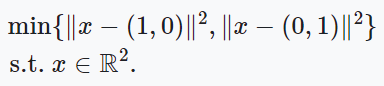

Try to generate a representative set of Pareto optimal solutions using the weighting method for the above bi-objective problem. Compare this set to the set of Pareto optimal solutions from task 1 in exercise 6. What do you notice?

In [ ]:
# input x is two dimensional
def opt_problem(x):
    return [
            (x[0] - 1)**2 + x[1]**2,
            x[0]**2 + (x[1] - 1)**2
        ]

In [ ]:
# input x is two dimensional
def opt_problem_normalized(x):
    z_ideal = [0,0]
    z_nadir = [2,2]
    z = opt_problem(x)
    return [(zi-zideali)/(znadiri-zideali) for
            (zi,zideali,znadiri) in zip(z,z_ideal,z_nadir)]

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
from scipy.optimize import minimize

def weighting_method(f, w):
    points = []
    start = [1, 1] # Starting values for the variables

    def weighted_sum(x):
        return sum(np.array(wi) * np.array(f(x)))

    weighted_sum_grad = grad(weighted_sum)

    for wi in w:
        res = minimize(
            weighted_sum,
            start,
            method='SLSQP',
            jac=weighted_sum_grad
        )
        points.append(res.x)
    return points


In [ ]:
w = np.random.random ((200,2))

In [ ]:
# normalize the weights
wn = w
for i in range(len(w)):
    s = sum(w[i])
    for j in range(2):
        wn[i][j] = w[i][j]/s

In [ ]:
repr = weighting_method(opt_problem_normalized,wn)

In [ ]:
import matplotlib.pyplot as plt

def visualize_representation(func, repr):
    f_repr = [func(repri) for repri in repr]
    print(min(f_repr))
    print(max(f_repr))
    fig, ax = plt.subplots()
    ax.scatter([f[0] for f in f_repr], [f[1] for f in f_repr])
    plt.show()

[6.871992509652616e-05, 1.9766217712798633]
[1.9703390509539265, 0.00011079458989069634]


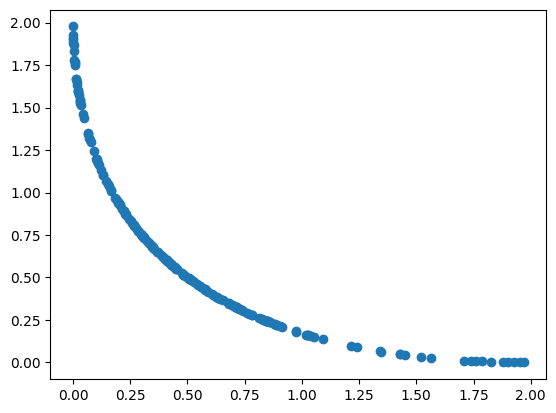

In [ ]:
visualize_representation(opt_problem,repr)

I found that pareto optimal is not same as i thought in exercise 6 :/ this comes form point [0,2] to point [2,0] in continuous curve. So i was probably wrong in exercise 6.

# Task 2

 Show that (mathematically):

 A. an optimal solution to the achievement scalarizing problem (follow the formulation mentioned in the lecture) is Pareto optimal, and

  B. for all Pareto optimal solutions x∗
, there exists a reference point such that x∗
 is an optimal solution to the achievement scalarizing problem with ρ=0
 (i.e., without the augmentation term).

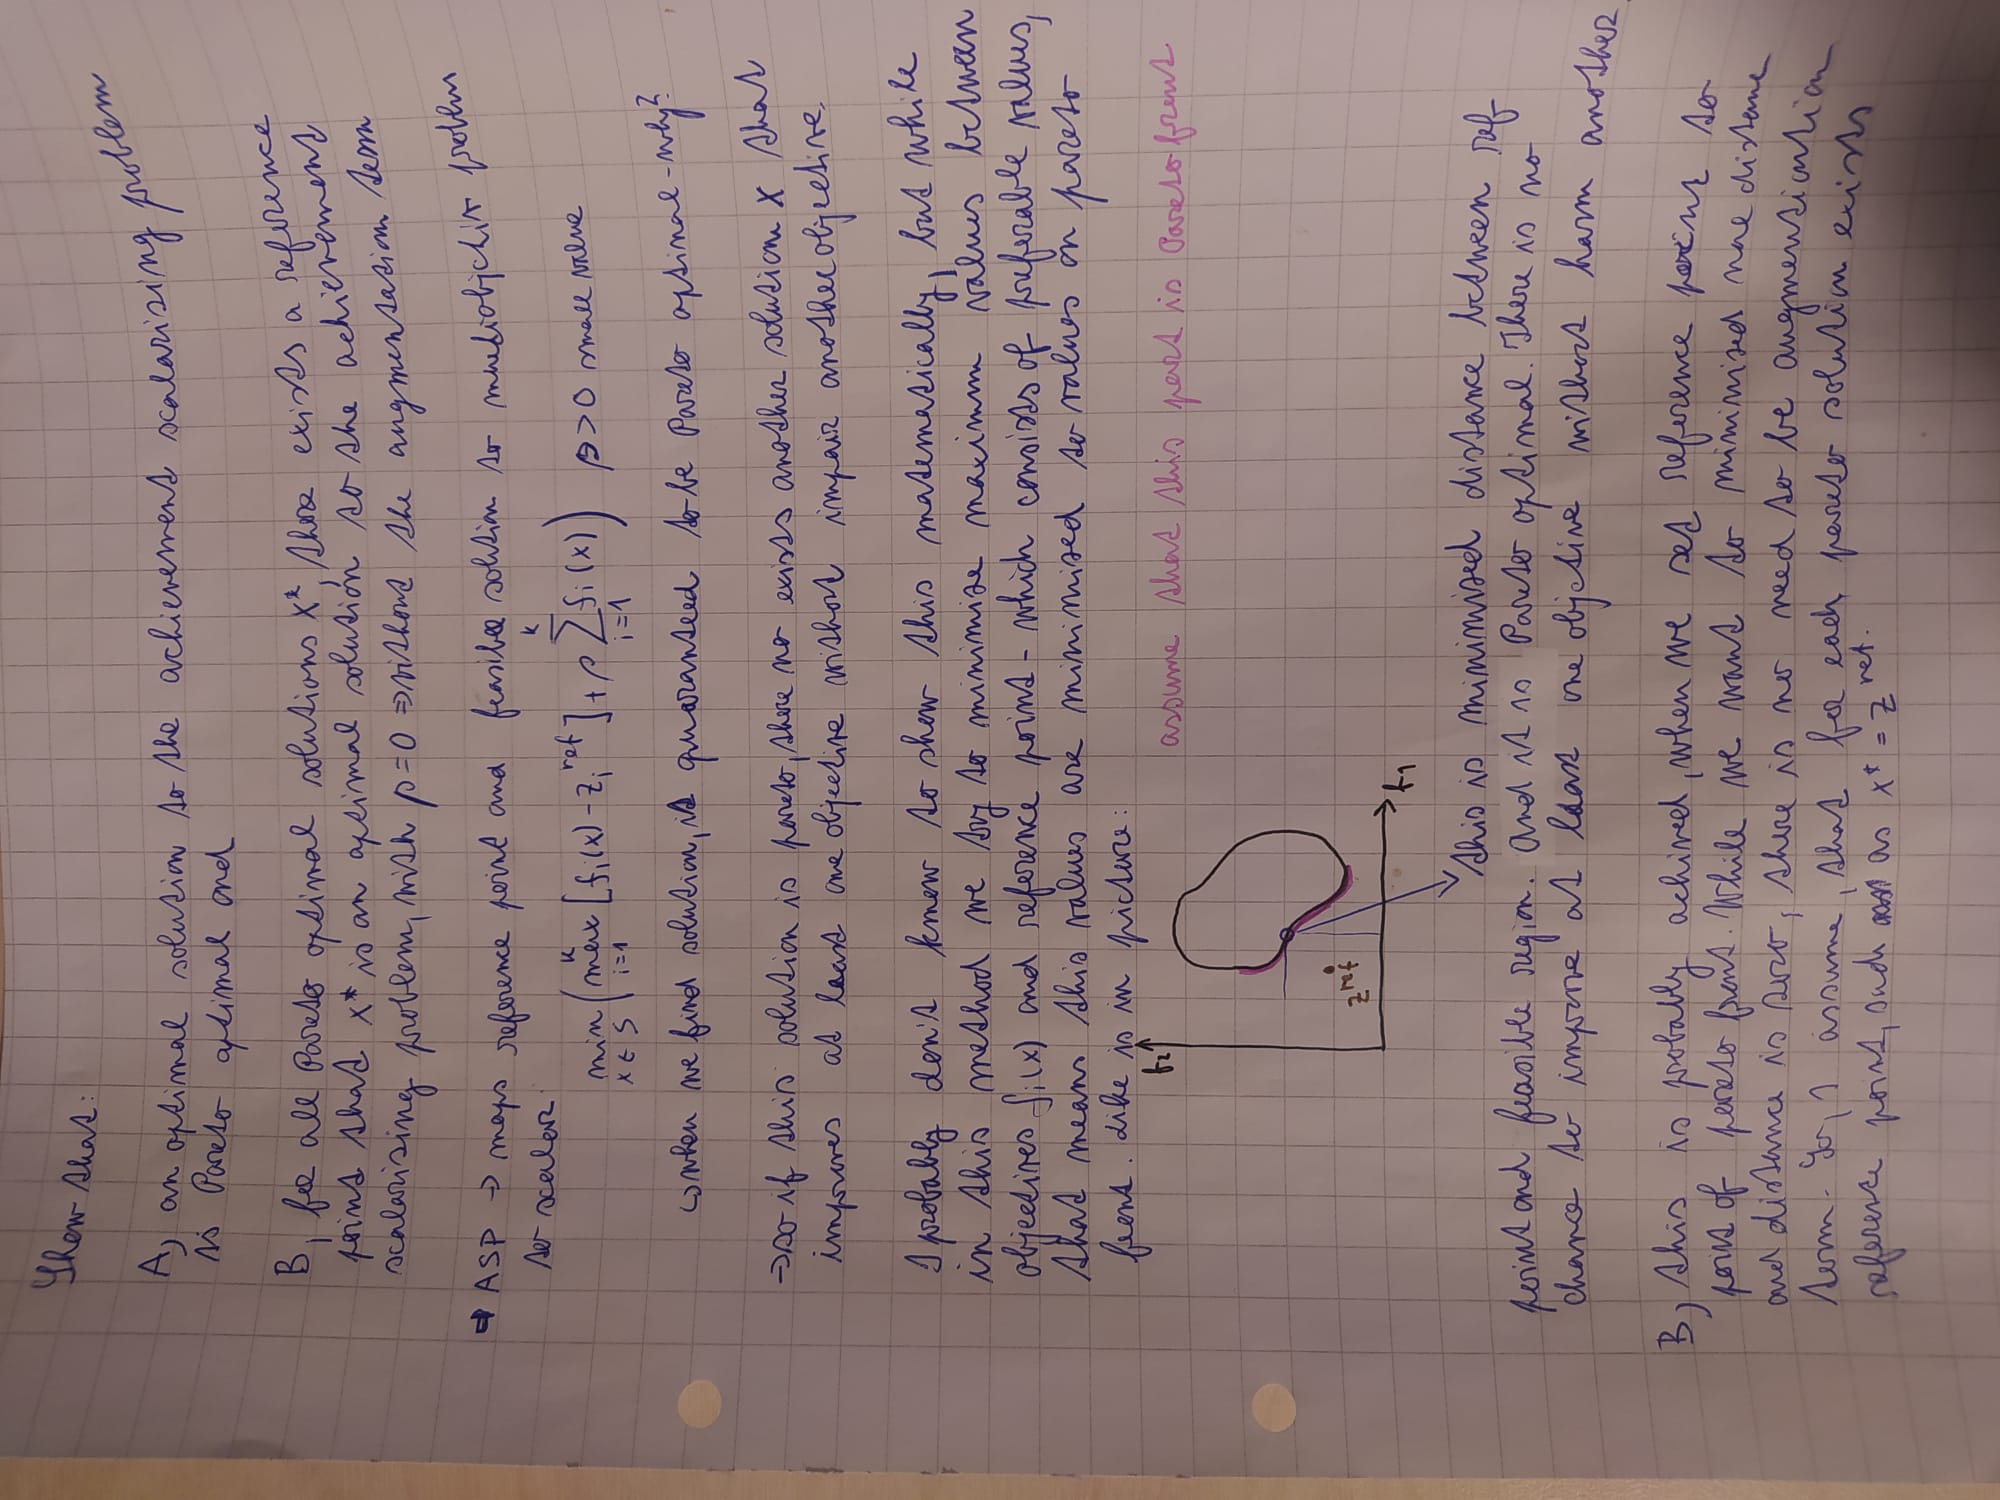

# Task 3

Think of a multiobjective optimization problem from your own life with at least three objectives. Model this problem using algebraic equations (decision variables, objective functions, constraints).

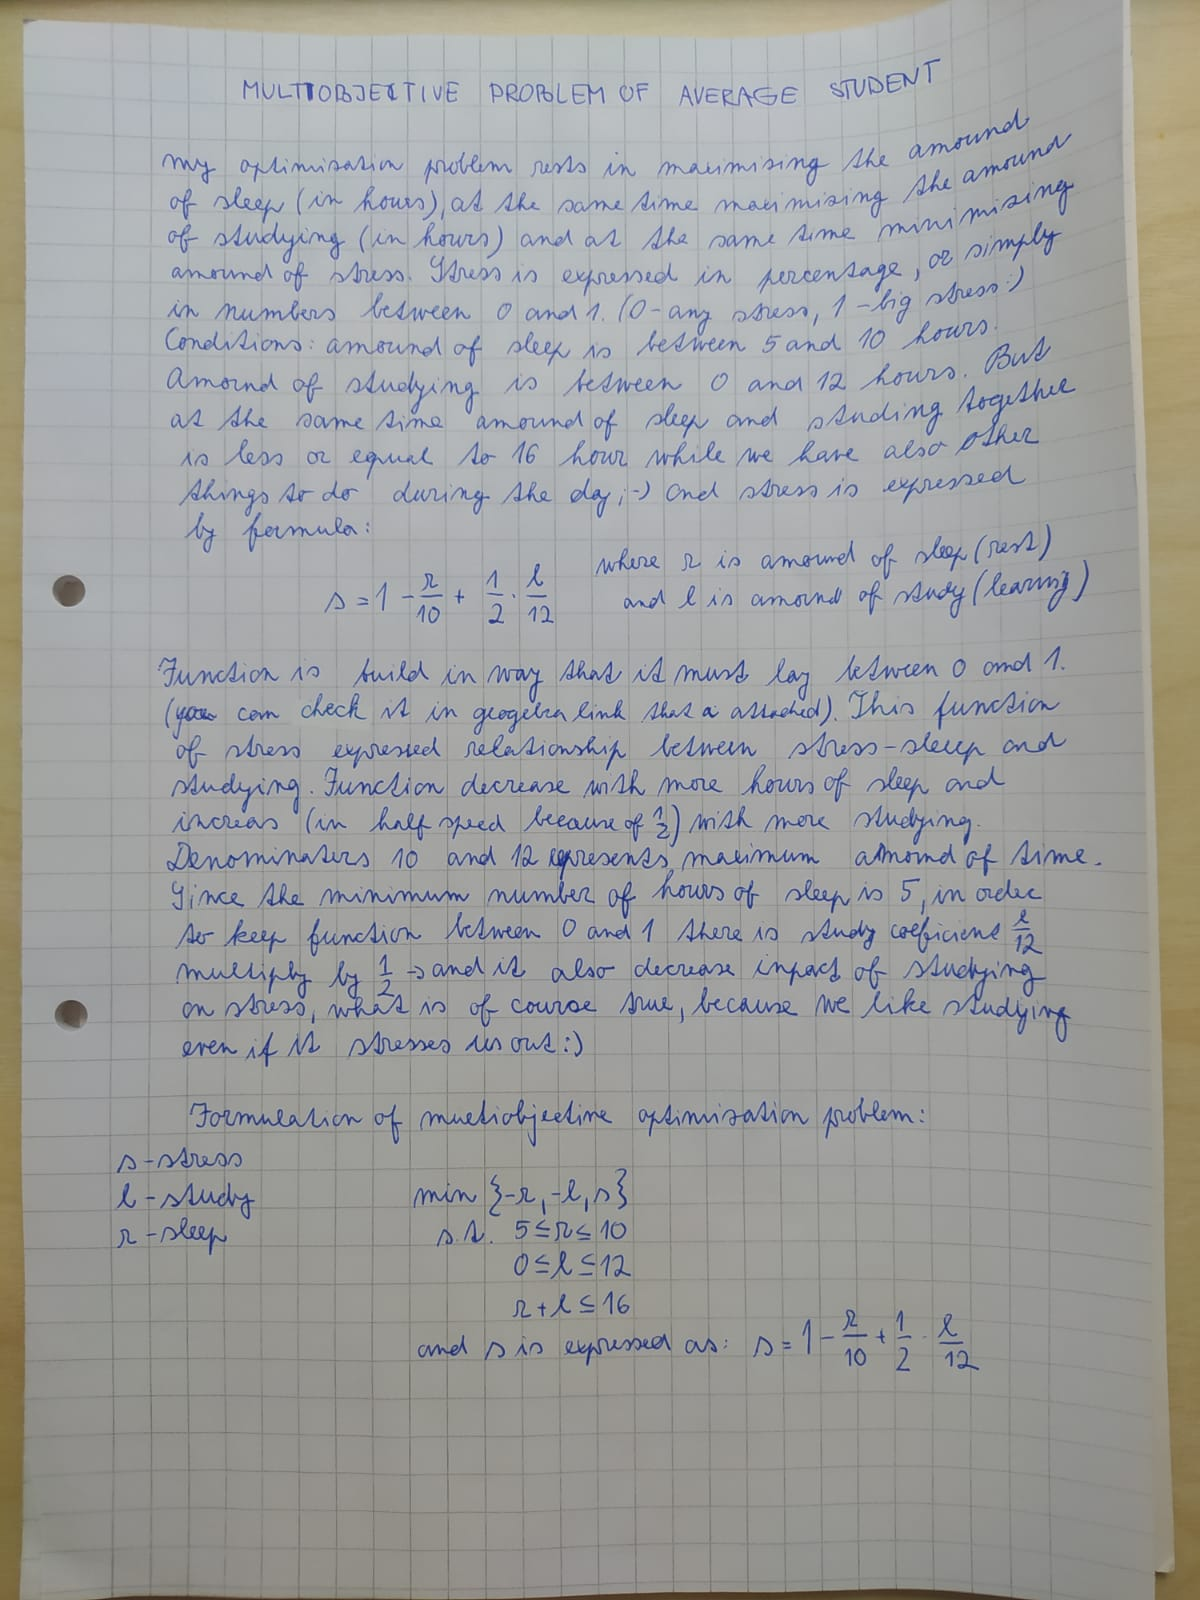


Stress function visualize in geogebra (you can try play with sliders) - https://www.geogebra.org/m/jedyzdsp

# Task 4

Use the DESDEO framework to create a problem object for your problem. Then, find the ideal and nadir vectors by using the tools available in DESDEO. Finally, import the NIMBUS method, solve your problem, and find preferable solutions (with at least three iterations). Describe how you inputted your problem and what kind of preference information (i.e., classification of objectives) you used when computing improved solutions starting from the initial solution. Analyze the results (i.e., write what you think about the solutions found).

Hint. See examples in the DESDEO paper https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9591595 .

In [ ]:
!pip install desdeo

Define objectives and optimization problem in desdeo

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from desdeo_problem.problem import MOProblem
from desdeo_problem.problem.Variable import variable_builder
from desdeo_problem.problem.Objective import _ScalarObjective
from desdeo_problem import ScalarConstraint

def f_1(x: np.ndarray):
    x = np.atleast_2d(x)
    return - x[:, 0]

def f_2(x: np.ndarray):
    x = np.atleast_2d(x)
    return - x[:, 1]

def f_3(x: np.ndarray):
    x = np.atleast_2d(x)
    return 1 - (x[:,0] / 10) + (0.5 * x[:,1]/12)


varsl = variable_builder(
    ["sleep", "study"],
    initial_values=[5, 11],
    lower_bounds=[5, 0],
    upper_bounds=[10, 12],
)

f1 = _ScalarObjective(name="sleep", evaluator=f_1)
f2 = _ScalarObjective(name="study", evaluator=f_2)
f3 = _ScalarObjective(name="stress", evaluator=f_3)


const_func = lambda x, y: 16 - (x[:, 0] + x[:, 1])

# Args: name, number of variables, number of objectives, callable
cons1 = ScalarConstraint("c_1", 2, 3, const_func)


problem = MOProblem(variables=varsl, objectives=[f1, f2, f3],constraints=[cons1])

In [ ]:
n = 10000
nums = [0,0,0,0]
for i in range(4):
  num = 0
  for j in range(n):
    num += np.random.normal(1, 0.1)
  nums[i] = num / n
print(nums)

[0.9986883280317638, 1.0013171387718545, 0.998640470842704, 1.0004439391140978]


In [ ]:
import numpy as np
from desdeo_problem.problem import MOProblem
from desdeo_problem.problem.Variable import variable_builder
from desdeo_problem.problem.Objective import ScalarObjective
from desdeo_problem.problem.Constraint import ScalarConstraint

def f_1(x):
    x = np.atleast_2d(x)
    #xi = np.random.normal(1, 0.1, size=(x.shape[0], 2))  # Generate random noise
    #print(xi)
    xi = [nums[0], nums[1]]
    xi = np.atleast_2d(xi)
    return (x[:, 0] * xi[:, 0] - 2)**2 + (x[:, 1] * xi[:, 1] - 1)**2

def f_2(x):
    x = np.atleast_2d(x)
    #xi = np.random.normal(1, 0.1, size=(x.shape[0], 2))  # Generate random noise
    xi = [nums[2], nums[3]]
    xi = np.atleast_2d(xi)
    return (x[:, 0] * xi[:, 0])**2 + (x[:, 1] * xi[:, 1] - 6)**2

varsl = variable_builder(
    ["x1", "x2"],
    initial_values=[5, 5],
    lower_bounds=[-10, -10],
    upper_bounds=[10, 10],
)

f1 = ScalarObjective(name="Objective 1", evaluator=f_1, maximize=False)
f2 = ScalarObjective(name="Objective 2", evaluator=f_2, maximize=False)

problem = MOProblem(variables=varsl, objectives=[f1, f2])


Calculate ideal and nadir vector

In [ ]:
from desdeo_mcdm.utilities import payoff_table_method

ideal, nadir = payoff_table_method(problem)

problem.ideal = ideal
problem.nadir = nadir

In [ ]:
print(f"ideal: {ideal}")
print(f"nadir: {nadir}")

ideal: [0. 0.]
nadir: [29.05239616 29.00833792]


Rounded ideal: [-10,-11,0]

Rounded nadir: [-5, 0, 0.95]

Calculate Pareto optimal front

In [ ]:
from desdeo_mcdm.utilities.solvers import solve_pareto_front_representation
p_front = solve_pareto_front_representation(problem, step=1.0)[1]

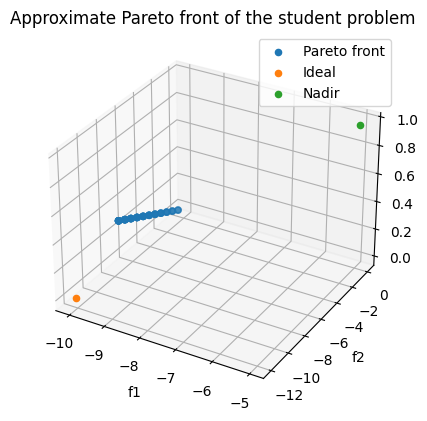

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(p_front[:, 0], p_front[:, 1], p_front[:, 2], label="Pareto front")
ax.scatter(problem.ideal[0], problem.ideal[1], problem.ideal[2], label="Ideal")
ax.scatter(problem.nadir[0], problem.nadir[1], problem.nadir[2], label="Nadir")
ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel("f3")
ax.set_title("Approximate Pareto front of the student problem")
ax.legend()

plt.show()


In [ ]:
print(p_front[:, 0], p_front[:, 1], p_front[:, 2])

Solving problem using NIMBUS method

In [ ]:
from desdeo_mcdm.interactive.NIMBUS import NIMBUS

method = NIMBUS(problem, "scipy_de")

classification_request, plot_request = method.start()

In [ ]:
print(classification_request.content["message"])

Please classify each of the objective values in one of the following categories:
	1. values should improve '<'
	2. values should improve until some desired aspiration level is reached '<='
	3. values with an acceptable level '='
	4. values which may be impaired until some upper bound is reached '>='
	5. values which are free to change '0'
Provide the aspiration levels and upper bounds as a vector. For categories 1, 3, and 5,the value in the vector at the objective's position is ignored. Supply also the number of maximumsolutions to be generated.


First found objectives

In [ ]:
print(classification_request.content["objective_values"])

[-8.96735833 -7.03239769  0.39628074]


In [ ]:
response = {
    "classifications": [">=", "=","<"],
    "number_of_solutions": 3,
    "levels": [-7, 0, 0]
}
classification_request.response = response

In [ ]:
save_request, plot_request = method.iterate(classification_request)

In [ ]:
print(save_request.content.keys())
print(save_request.content["message"])
print(save_request.content["objectives"])

dict_keys(['message', 'solutions', 'objectives', 'indices'])
Please specify which solutions shown you would like to save for later viewing. Supply the indices of such solutions as a list, or supply an empty list if none of the shown solutions should be saved.
[array([-8.25818312, -7.7418131 ,  0.49675723]), array([-8.43553592, -7.56445963,  0.47163223]), array([-8.61288184, -7.3870957 ,  0.44650747])]


In [ ]:
# i like 0 and 2 solution
response = {"indices": [0, 2]}
save_request.response = response

intermediate_request, plot_request = method.iterate(save_request)

In [ ]:
print(intermediate_request.content.keys())
print(intermediate_request.content["message"])

dict_keys(['message', 'solutions', 'objectives', 'indices', 'number_of_desired_solutions'])
Would you like to see intermediate solutions between two previously computed solutions? If so, please supply two indices corresponding to the solutions.


In [ ]:
# i want see some intermediate solutions
response = {
    "indices": [0,1],
    "number_of_desired_solutions": 3,
    }
intermediate_request.response = response

save_request, plot_request = method.iterate(intermediate_request)

Vizualizing intermediate solutions

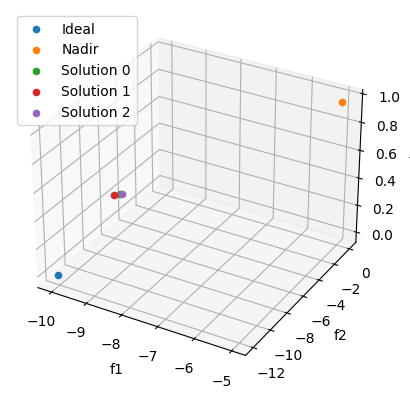

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(p_front[:, 0], p_front[:, 1], p_front[:, 2], label="Pareto front")
ax.scatter(problem.ideal[0], problem.ideal[1], problem.ideal[2], label="Ideal")
ax.scatter(problem.nadir[0], problem.nadir[1], problem.nadir[2], label="Nadir")

for i, z in enumerate(save_request.content["objectives"]):
    ax.scatter(z[0], z[1], z[2], label=f"Solution {i}")

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel("f3")
ax.legend()

plt.show()


In [ ]:
for i, z in enumerate(save_request.content["objectives"]):
    print(f"{z[0]} , {z[1]} , {z[2]} , Solution {i}")

-9.99972116150535 , -5.275436437299252 , 0.21983773540360044 , Solution 0
-9.999725825970163 , -5.927036911297853 , 0.24698728870706096 , Solution 1
-9.682183546019564 , -6.31721261345787 , 0.29499883762545487 , Solution 2


In [ ]:
# i like all solutions so i save them
response = {"indices": [0,1,2]}
save_request.response = response

intermediate_request, plot_request = method.iterate(save_request)

In [ ]:
# any other intermediate solutions
response = {"number_of_desired_solutions": 0, "indices": []}
intermediate_request.response = response

preferred_request, plot_request = method.iterate(intermediate_request)

In [ ]:
print(preferred_request.content.keys())
print(preferred_request.content["message"])

dict_keys(['message', 'solutions', 'objectives', 'index', 'continue'])
Please select your most preferred solution and whether you would like to continue. 


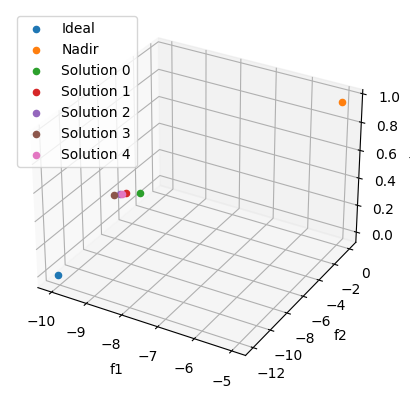

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(p_front[:, 0], p_front[:, 1], p_front[:, 2], label="Pareto front")
ax.scatter(problem.ideal[0], problem.ideal[1], problem.ideal[2], label="Ideal")
ax.scatter(problem.nadir[0], problem.nadir[1], problem.nadir[2], label="Nadir")

for i, z in enumerate(preferred_request.content["objectives"]):
    ax.scatter(z[0], z[1], z[2], label=f"Solution {i}")

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel("f3")
ax.legend()

plt.show()


In [ ]:
# save as preffered soultion 1
response = {"index": 1, "continue": True}
preferred_request.response = response

classification_request, plot_request = method.iterate(preferred_request)

In [ ]:
print(classification_request.content["message"])

Please classify each of the objective values in one of the following categories:
	1. values should improve '<'
	2. values should improve until some desired aspiration level is reached '<='
	3. values with an acceptable level '='
	4. values which may be impaired until some upper bound is reached '>='
	5. values which are free to change '0'
Provide the aspiration levels and upper bounds as a vector. For categories 1, 3, and 5,the value in the vector at the objective's position is ignored. Supply also the number of maximumsolutions to be generated.


In [ ]:
print(classification_request.content["objective_values"])

[-9.99957982 -4.62373898  0.19269781]


In [ ]:
response = {
    "classifications": [">=", "<",">="],
    "number_of_solutions": 4,
    "levels": [-7, 0, 0.3]
}
classification_request.response = response

save_request, plot_request = method.iterate(classification_request)

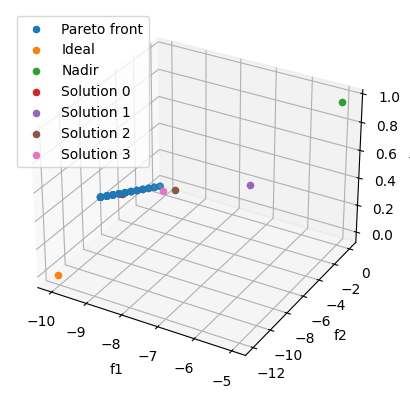

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(p_front[:, 0], p_front[:, 1], p_front[:, 2], label="Pareto front")
ax.scatter(problem.ideal[0], problem.ideal[1], problem.ideal[2], label="Ideal")
ax.scatter(problem.nadir[0], problem.nadir[1], problem.nadir[2], label="Nadir")

for i, z in enumerate(save_request.content["objectives"]):
    ax.scatter(z[0], z[1], z[2], label=f"Solution {i}")

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel("f3")
ax.legend()

plt.show()


In [ ]:
# i like solutions 0 and 3
response = {"indices": [0, 3]}
save_request.response = response

intermediate_request, plot_request = method.iterate(save_request)

plot everything we have so far:

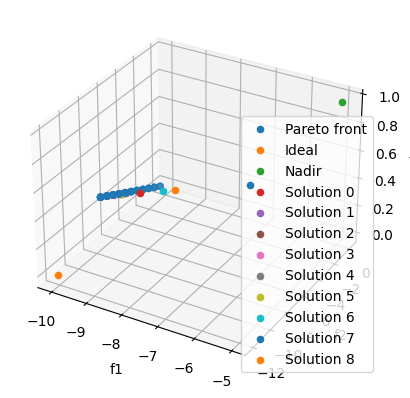

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(p_front[:, 0], p_front[:, 1], p_front[:, 2], label="Pareto front")
ax.scatter(problem.ideal[0], problem.ideal[1], problem.ideal[2], label="Ideal")
ax.scatter(problem.nadir[0], problem.nadir[1], problem.nadir[2], label="Nadir")

for i, z in enumerate(intermediate_request.content["objectives"]):
    ax.scatter(z[0], z[1], z[2], label=f"Solution {i}")

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel("f3")
ax.legend()

plt.show()


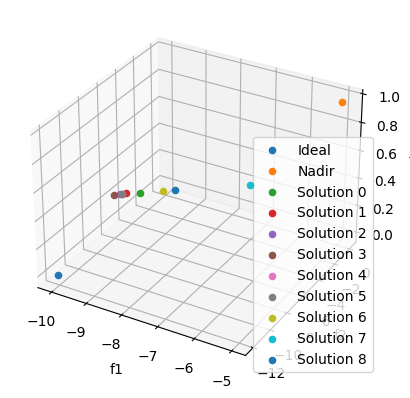

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(p_front[:, 0], p_front[:, 1], p_front[:, 2], label="Pareto front")
ax.scatter(problem.ideal[0], problem.ideal[1], problem.ideal[2], label="Ideal")
ax.scatter(problem.nadir[0], problem.nadir[1], problem.nadir[2], label="Nadir")

for i, z in enumerate(intermediate_request.content["objectives"]):
    ax.scatter(z[0], z[1], z[2], label=f"Solution {i}")

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel("f3")
ax.legend()

plt.show()


In [ ]:
# some other solutions between 0 and 6 actual solution
response = {
    "indices": [0,6],
    "number_of_desired_solutions": 3,
    }
intermediate_request.response = response

save_request, plot_request = method.iterate(intermediate_request)

Plot the intermediate solutions:

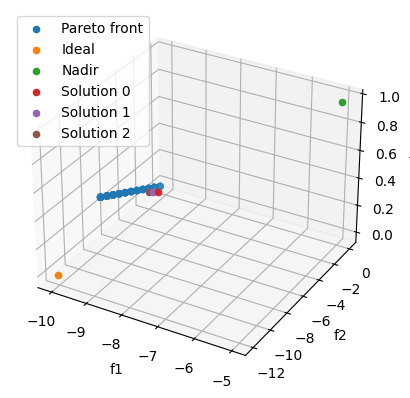

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(p_front[:, 0], p_front[:, 1], p_front[:, 2], label="Pareto front")
ax.scatter(problem.ideal[0], problem.ideal[1], problem.ideal[2], label="Ideal")
ax.scatter(problem.nadir[0], problem.nadir[1], problem.nadir[2], label="Nadir")

for i, z in enumerate(save_request.content["objectives"]):
    ax.scatter(z[0], z[1], z[2], label=f"Solution {i}")

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel("f3")
ax.legend()

plt.show()


In [ ]:
for i, z in enumerate(save_request.content["objectives"]):
    print(f"{z[0]} , {z[1]} , {z[2]} , Solution {i}")

-8.258183124766592 , -7.741813099327447 , 0.496757233328651 , Solution 0
-8.43553591915232 , -7.564459632807209 , 0.47163222611840167 , Solution 1
-8.612881844993801 , -7.387095697001812 , 0.44650746954236215 , Solution 2


In [ ]:
# wanna save solution 2, best stress (still huge anyway)
response = {"indices": [2]}
save_request.response = response

intermediate_request, plot_request = method.iterate(save_request)

In [ ]:
response = {"number_of_desired_solutions": 0, "indices": []}
intermediate_request.response = response

preferred_request, plot_request = method.iterate(intermediate_request)

Let us plot everything we have, and select a final solution:

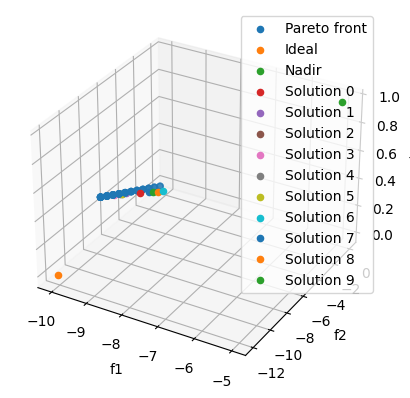

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(p_front[:, 0], p_front[:, 1], p_front[:, 2], label="Pareto front")
ax.scatter(problem.ideal[0], problem.ideal[1], problem.ideal[2], label="Ideal")
ax.scatter(problem.nadir[0], problem.nadir[1], problem.nadir[2], label="Nadir")

for i, z in enumerate(preferred_request.content["objectives"]):
    ax.scatter(z[0], z[1], z[2], label=f"Solution {i}")

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel("f3")
ax.legend()

plt.show()


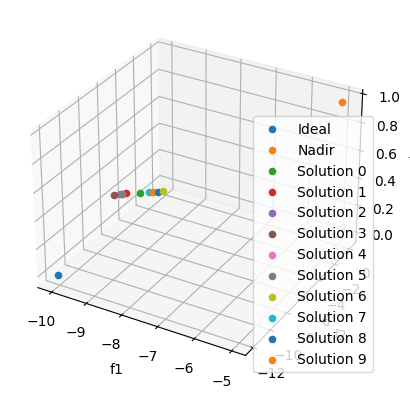

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(p_front[:, 0], p_front[:, 1], p_front[:, 2], label="Pareto front")
ax.scatter(problem.ideal[0], problem.ideal[1], problem.ideal[2], label="Ideal")
ax.scatter(problem.nadir[0], problem.nadir[1], problem.nadir[2], label="Nadir")


for i, z in enumerate(preferred_request.content["objectives"]):
    ax.scatter(z[0], z[1], z[2], label=f"Solution {i}")

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel("f3")
ax.legend()

plt.show()


Print the values of solutions

In [ ]:
for i, z in enumerate(preferred_request.content["objectives"]):
    print(f"{z[0]} , {z[1]} , {z[2]} , Solution {i}")

-8.9676011619917 , -7.03239824932098 , 0.3962564775225374 , Solution 0
-9.999579818424214 , -4.62373897911359 , 0.19269780895397812 , Solution 1
-9.99972116150535 , -5.275436437299252 , 0.21983773540360044 , Solution 2
-9.999725825970163 , -5.927036911297853 , 0.24698728870706096 , Solution 3
-9.682183546019564 , -6.31721261345787 , 0.29499883762545487 , Solution 4
-9.647056438132598 , -6.352723051237344 , 0.2999911499882963 , Solution 5
-8.075857198662481 , -7.9150783993078235 , 0.5222092134382446 , Solution 6
-8.612881844993801 , -7.387095697001812 , 0.44650746954236215 , Solution 7
-8.258183124766592 , -7.741813099327447 , 0.496757233328651 , Solution 8
-8.43553591915232 , -7.564459632807209 , 0.47163222611840167 , Solution 9


In [ ]:
response = {
    "index": 5,
    "continue": False,
    }

preferred_request.response = response

stop_request, plot_request = method.iterate(preferred_request)

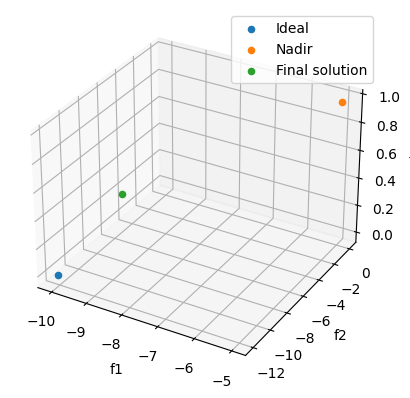

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(problem.ideal[0], problem.ideal[1], problem.ideal[2], label="Ideal")
ax.scatter(problem.nadir[0], problem.nadir[1], problem.nadir[2], label="Nadir")

ax.scatter(stop_request.content["objective"][0], stop_request.content["objective"][1], stop_request.content["objective"][2], label="Final solution")

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel("f3")
ax.legend()

plt.show()


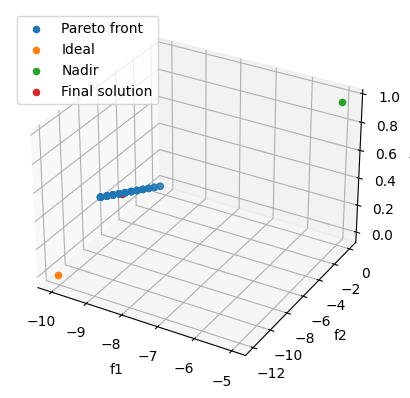

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(p_front[:, 0], p_front[:, 1], p_front[:, 2], label="Pareto front")
ax.scatter(problem.ideal[0], problem.ideal[1], problem.ideal[2], label="Ideal")
ax.scatter(problem.nadir[0], problem.nadir[1], problem.nadir[2], label="Nadir")

ax.scatter(stop_request.content["objective"][0], stop_request.content["objective"][1], stop_request.content["objective"][2], label="Final solution")

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel("f3")
ax.legend()

plt.show()


In [ ]:
print(stop_request.content["objective"][0], stop_request.content["objective"][1], stop_request.content["objective"][2])

-9.647056438132598 -6.352723051237344 0.2999911499882963


In [ ]:
import plotly.express as px

data = {
    'x': [problem.ideal[0], problem.nadir[0], stop_request.content["objective"][0]],
    'y': [problem.ideal[1], problem.nadir[1], stop_request.content["objective"][1]],
    'z': [problem.ideal[2], problem.nadir[2], stop_request.content["objective"][2]],
    'label': ["Ideal", "Nadir", "Final solution"]
}

fig = px.scatter_3d(data, x='x', y='y', z='z', color='label')
fig.show()

# Conclusion

Rounded ideal: [-10,-11,0]

Rounded nadir: [-5, 0, 0.95].

My final preferred solution is [-9.64, -6.35, 0.29]. While I like sleep greatly, I chose this solution because 6 hours of study seems adequate, and having only 29% stress feels acceptable. I struggled a bit with the input problem initially, but after reading the documentation and examining some examples, I found it simpler to formulate the problem and its conditions.

I must admit that the first solution provided by the Nimbus algorithm was quite good ([-8.96735833, -7.03239769, 0.39628074]), so I decided to experiment more with reducing stress in another iterations. I allowed the function to impair sleep (>=) up to 7 hours and improve stress (<). Then, I experimented with intermediate solutions multiple times, selecting the best among them. Of course, I also refined the classification of objectives several times.

I found this task enjoyable, and it occurred to me that I could devise a more complex example and engage in further experimentation. Despite this, I believe I have gained at least a basic understanding of working with the framework based on this example.